In [1]:
import pickle
import numpy as np
import os,sys
import matplotlib.pyplot as plt 

In [2]:
path_discoveri = "/Users/francescomassimo/Codes/Optimization_on_cluster/Discoveri"
sys.path.insert(0, path_discoveri)

import Discoveri class

In [3]:
optimization_method                     = "Bayesian Optimization" 
# This example shows the use of a Bayesian Optimization
# with a function which has  multiple peaks

## Parameter space to explore

In [4]:
number_of_dimensions                    = 2 
search_interval                         = [[0.,10.],[0.,10.]]
input_parameters_names                  = ["dim0","dim1"]

In [121]:
number_of_samples_per_iteration         = 20

## Optimization parameters

In [116]:
number_of_iterations                    = 100

## Diagnostic and output dump periodicity

In [7]:
iterations_between_outputs              = 10

In [8]:
## Flag used to set if a numpy function or simulation results are optimized:
## if True it optimizes (i.e. maximizes) a numpy function defined in test_function
## Otherwise, it will postprocess simulation results using the function defined in simulation_postprocessing_function
## In both cases it is absolutely necessary that the function to optimize gives a number, different from inf,-inf and from nan
use_test_function                       = True

In [ ]:
test_function                           = None
simulation_postprocessing_function      = None

In [67]:
def my_test_function(x): # maximum near (4.5,4.5)
    return np.sum(np.sinc(x-5.2))
    
test_function                           = my_test_function

# Optimization of the test function

In [123]:
from discoveriMain import createOptimizationRun

starting_directory = os.getcwd()

# initialize an optimization run 
# the optimizer hyperparameters will be the default ones
optimization_run   = createOptimizationRun(starting_directory              = starting_directory,               \
                                           optimization_method             = optimization_method,              \
                                           number_of_samples_per_iteration = number_of_samples_per_iteration,  \
                                           number_of_dimensions            = number_of_dimensions,             \
                                           search_interval                 = search_interval,                  \
                                           number_of_iterations            = number_of_iterations,             \
                                           use_test_function               = use_test_function,                \
                                           test_function                   = test_function,                    \
                                           iterations_between_outputs      = iterations_between_outputs,       \
                                           input_parameters_names          = input_parameters_names )
    
# execute optimization run
optimization_run.execute()
    
    
# Save the optimization_run object to a file
with open('optimization_run.pkl', 'wb') as file:
    pickle.dump(optimization_run, file)
        
        
# You can load the file later
with open('optimization_run.pkl', 'rb') as file:
    loaded_optimization_run = pickle.load(file)
        

    
       

                                                                                  
           _____    _                                              _              
          |  __ \  (_)                                            (_)             
          | |  | |  _   ___    ___    ___   __   __   ___   _ __   _              
          | |  | | | | / __|  / __|  / _ \  \ \ / /  / _ \ | '__| | |             
          | |__| | | | \__ \ | (__  | (_) |  \ V /  |  __/ | |    | |             
          |_____/  |_| |___/  \___|  \___/    \_/    \___| |_|    |_|             
                                                                                  
           Data-driven Investigation through Simulations on Clusters              
  for the Optimization of the physical Variables' Effects in Regimes of Interest  
                                                                                  
                                                                                  

 In

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: Conv


# Optimum value    found by the Bayesian Optimization =  1.7651187111489524

# Optimum position found by the Bayesian Optimization =  [5.23030262 5.59117901]




 Iteration: 6 / 100

 Total time lapsed from the start of the optimization =  0.24118614196777344  s




 ---> Sample 0 Position: [9.18748303 8.38294043]  --> function value at this iteration =  -0.0575013030270116

 ---> Sample 1 Position: [2.11590227 2.76654346]  --> function value at this iteration =  0.10100570420672195

 ---> Sample 2 Position: [0.81666223 5.74724661]  --> function value at this iteration =  0.6430567693947453

 ---> Sample 3 Position: [0.50975327 7.09592036]  --> function value at this iteration =  0.0021776992803812095

 ---> Sample 4 Position: [8.14770878 0.08160307]  --> function value at this iteration =  -0.00494201065467963

 ---> Sample 5 Position: [5.16153398 7.42057214]  --> function value at this iteration =  1.0891383612097922

 ---> Sample 6 Position: [0.25413058 7.29073888]  --> function va

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.7651187111489524

# Optimum position found by the Bayesian Optimization =  [5.23030262 5.59117901]




 Iteration: 7 / 100

 Total time lapsed from the start of the optimization =  0.5429229736328125  s




 ---> Sample 0 Position: [6.55028166 2.06366008]  --> function value at this iteration =  -0.2522908125303648

 ---> Sample 1 Position: [1.60808069 9.72661339]  --> function value at this iteration =  -0.014874982234854589

 ---> Sample 2 Position: [1.93843191 7.16987289]  --> function value at this iteration =  -0.08674242116497548

 ---> Sample 3 Position: [0.57666377 5.39670715]  --> function value at this iteration =  1.0013003469935202

 ---> Sample 4 Position: [3.86162813 0.6241381 ]  --> function value at this iteration =  -0.1402298706996891

 ---> Sample 5 Position: [0.15347755 7.41119498]  --> function value at this iteration =  0.07947075708701255

 ---> Sample 6 Position: [4.96289811 3.82408582]  --> function va

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.7651187111489524

# Optimum position found by the Bayesian Optimization =  [5.23030262 5.59117901]




 Iteration: 8 / 100

 Total time lapsed from the start of the optimization =  0.8457317352294922  s




 ---> Sample 0 Position: [6.59503928 8.9551527 ]  --> function value at this iteration =  -0.2748406227132143

 ---> Sample 1 Position: [6.03305769 5.51458392]  --> function value at this iteration =  1.0363154861921393

 ---> Sample 2 Position: [0.53424195 8.79087172]  --> function value at this iteration =  -0.02587681397332707

 ---> Sample 3 Position: [7.15201199 7.38325123]  --> function value at this iteration =  0.054883944124967596

 ---> Sample 4 Position: [7.94466255 7.20106633]  --> function value at this iteration =  0.0839024775460499

 ---> Sample 5 Position: [6.9050253  5.53904715]  --> function value at this iteration =  0.6720676099336044

 ---> Sample 6 Position: [5.66076151 4.16352743]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.7651187111489524

# Optimum position found by the Bayesian Optimization =  [5.23030262 5.59117901]




 Iteration: 9 / 100

 Total time lapsed from the start of the optimization =  1.1891019344329834  s




 ---> Sample 0 Position: [8.62373005 7.2737223 ]  --> function value at this iteration =  -0.0550818086321815

 ---> Sample 1 Position: [4.4136748 6.6159178]  --> function value at this iteration =  0.034774578906921094

 ---> Sample 2 Position: [3.01527646 9.23484299]  --> function value at this iteration =  0.08850403050088805

 ---> Sample 3 Position: [4.07074218 5.30588627]  --> function value at this iteration =  0.8703162341951836

 ---> Sample 4 Position: [2.78852539 0.89684255]  --> function value at this iteration =  0.18719843738573905

 ---> Sample 5 Position: [3.61301431 0.07494863]  --> function value at this iteration =  -0.21690951657802515

 ---> Sample 6 Position: [5.95625622 3.72518537]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.7651187111489524

# Optimum position found by the Bayesian Optimization =  [5.23030262 5.59117901]




 Iteration: 10 / 100

 Total time lapsed from the start of the optimization =  1.4943280220031738  s




 ---> Sample 0 Position: [7.95880079 9.57394806]  --> function value at this iteration =  0.14644126715102984

 ---> Sample 1 Position: [3.55718931 8.82864926]  --> function value at this iteration =  -0.2552371382166091

 ---> Sample 2 Position: [9.81440983 0.97509089]  --> function value at this iteration =  0.11348748640712056

 ---> Sample 3 Position: [5.49956953 4.99118396]  --> function value at this iteration =  1.788583483385814

 ---> Sample 4 Position: [9.76399897 6.59445695]  --> function value at this iteration =  -0.14749584529837034

 ---> Sample 5 Position: [8.09584416 9.49180736]  --> function value at this iteration =  0.09418941882453413

 ---> Sample 6 Position: [0.8187834  6.30108645]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]




 Iteration: 11 / 100

 Total time lapsed from the start of the optimization =  1.7975990772247314  s




 ---> Sample 0 Position: [7.41185435 4.71461628]  --> function value at this iteration =  0.7439638775471713

 ---> Sample 1 Position: [7.85849069 8.73132449]  --> function value at this iteration =  0.01549258703711874

 ---> Sample 2 Position: [3.0149405  6.99889914]  --> function value at this iteration =  -0.02449933261511178

 ---> Sample 3 Position: [7.8867484  9.11339086]  --> function value at this iteration =  0.07680327672382856

 ---> Sample 4 Position: [8.01191857 3.17129827]  --> function value at this iteration =  0.07719117658134833

 ---> Sample 5 Position: [8.76000287 4.9312472 ]  --> function value at this iteration =  0.7975242719851477

 ---> Sample 6 Position: [8.70753726 4.84479621]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]

=== Sample 0

=== optimum position found by sample  0  until now:  [7.41185435 4.71461628]

=== optimum function value found by sample  0  until now:  0.7439638775471713

=== Sample 1

=== optimum position found by sample  1  until now:  [6.03305769 5.51458392]

=== optimum function value found by sample  1  until now:  1.0363154861921393

=== Sample 2

=== optimum position found by sample  2  until now:  [4.87235335 7.68953199]

=== optimum function value found by sample  2  until now:  0.9603250846322539

=== Sample 3

=== optimum position found by sample  3  until now:  [5.49956953 4.99118396]

=== optimum function value found by sample  3  until now:  1.788583483385814

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]




 Iteration: 13 / 100

 Total time lapsed from the start of the optimization =  2.4196019172668457  s




 ---> Sample 0 Position: [0.85814973 0.43959107]  --> function value at this iteration =  0.11015836218885693

 ---> Sample 1 Position: [2.47083071 9.05835309]  --> function value at this iteration =  0.05217626414334294

 ---> Sample 2 Position: [9.21097408 2.91472042]  --> function value at this iteration =  0.11151578143865891

 ---> Sample 3 Position: [0.51406961 1.59053669]  --> function value at this iteration =  -0.02635807370700575

 ---> Sample 4 Position: [8.36272793 6.92194875]  --> function value at this iteration =  -0.19094846478151403

 ---> Sample 5 Position: [1.12893052 6.31639105]  --> function value at this iteration =  -0.08463626284506597

 ---> Sample 6 Position: [9.09636571 1.28216732]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]




 Iteration: 14 / 100

 Total time lapsed from the start of the optimization =  2.7188429832458496  s




 ---> Sample 0 Position: [7.47639638 1.2049967 ]  --> function value at this iteration =  0.10547469902708019

 ---> Sample 1 Position: [6.05290733 8.67525201]  --> function value at this iteration =  0.07507099244833078

 ---> Sample 2 Position: [4.49511862 7.67684502]  --> function value at this iteration =  0.4893964788901617

 ---> Sample 3 Position: [0.13335048 9.65989789]  --> function value at this iteration =  0.057747259874691884

 ---> Sample 4 Position: [8.25946215 9.71797784]  --> function value at this iteration =  0.05101906970569948

 ---> Sample 5 Position: [9.58431643 1.48916904]  --> function value at this iteration =  0.00021887267819277467

 ---> Sample 6 Position: [1.07645706 9.96736024]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.788583483385814

# Optimum position found by the Bayesian Optimization =  [5.49956953 4.99118396]




 Iteration: 15 / 100

 Total time lapsed from the start of the optimization =  3.0453929901123047  s




 ---> Sample 0 Position: [7.41961394 1.2490704 ]  --> function value at this iteration =  0.07890664268076285

 ---> Sample 1 Position: [3.31477933 0.40387009]  --> function value at this iteration =  -0.019912826738079835

 ---> Sample 2 Position: [4.55642504 6.83545442]  --> function value at this iteration =  0.26785825426461807

 ---> Sample 3 Position: [3.87230622 2.16471887]  --> function value at this iteration =  -0.21707012895370387

 ---> Sample 4 Position: [2.98482628 8.0183462 ]  --> function value at this iteration =  0.15091760059013648

 ---> Sample 5 Position: [3.26448664 9.51907003]  --> function value at this iteration =  0.0290200918547623

 ---> Sample 6 Position: [3.2576477  5.56206066]  --> function va

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 16 / 100

 Total time lapsed from the start of the optimization =  3.367949962615967  s




 ---> Sample 0 Position: [6.80428888 4.68248035]  --> function value at this iteration =  0.426279179924957

 ---> Sample 1 Position: [0.11310915 1.97366287]  --> function value at this iteration =  -0.08125899405642838

 ---> Sample 2 Position: [3.03150545 3.35202256]  --> function value at this iteration =  -0.0050494298736468435

 ---> Sample 3 Position: [1.58069625 7.18709218]  --> function value at this iteration =  -0.08833649174536344

 ---> Sample 4 Position: [7.24084599 8.41091059]  --> function value at this iteration =  -0.041024301024313155

 ---> Sample 5 Position: [6.72127088 0.51555223]  --> function value at this iteration =  -0.1519144034504677

 ---> Sample 6 Position: [6.47503806 6.01613209]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 17 / 100

 Total time lapsed from the start of the optimization =  3.702104091644287  s




 ---> Sample 0 Position: [1.65105102 1.26587767]  --> function value at this iteration =  -0.10525882239896776

 ---> Sample 1 Position: [8.18490126 6.28008319]  --> function value at this iteration =  -0.06830919305967252

 ---> Sample 2 Position: [9.01128941 9.80771654]  --> function value at this iteration =  0.01850036349478322

 ---> Sample 3 Position: [4.17369476 9.57484068]  --> function value at this iteration =  0.04160494323922431

 ---> Sample 4 Position: [0.07720858 7.9807012 ]  --> function value at this iteration =  0.049392594896855865

 ---> Sample 5 Position: [3.32355736 1.19265834]  --> function value at this iteration =  -0.062373561877713056

 ---> Sample 6 Position: [4.02306865 5.55343547]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 18 / 100

 Total time lapsed from the start of the optimization =  4.0160510540008545  s




 ---> Sample 0 Position: [7.76855631 7.00111148]  --> function value at this iteration =  0.017683209338253056

 ---> Sample 1 Position: [0.24072208 2.31203943]  --> function value at this iteration =  0.04618813826741525

 ---> Sample 2 Position: [5.56034283 7.40024961]  --> function value at this iteration =  0.884812816164729

 ---> Sample 3 Position: [2.33196698 5.78783876]  --> function value at this iteration =  0.5657111363077314

 ---> Sample 4 Position: [4.40053174 4.41666562]  --> function value at this iteration =  0.49029051228605264

 ---> Sample 5 Position: [9.24805525 2.76114395]  --> function value at this iteration =  0.13994169467979328

 ---> Sample 6 Position: [0.66411376 2.44411826]  --> function value a

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 19 / 100

 Total time lapsed from the start of the optimization =  4.324824810028076  s




 ---> Sample 0 Position: [8.53698112 2.21683182]  --> function value at this iteration =  -0.07751043155424443

 ---> Sample 1 Position: [9.07435629 6.22167839]  --> function value at this iteration =  -0.052796004182896206

 ---> Sample 2 Position: [8.05091239 5.02785973]  --> function value at this iteration =  1.0023682509638374

 ---> Sample 3 Position: [3.96794589 7.44639502]  --> function value at this iteration =  -0.07304710533931852

 ---> Sample 4 Position: [3.08983261 0.9998638 ]  --> function value at this iteration =  0.09574371379091373

 ---> Sample 5 Position: [7.52074428 1.00629478]  --> function value at this iteration =  0.1593692993364662

 ---> Sample 6 Position: [0.33789184 4.15614351]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 20 / 100

 Total time lapsed from the start of the optimization =  4.647094011306763  s




 ---> Sample 0 Position: [9.75886291 8.24056803]  --> function value at this iteration =  0.05532560254511201

 ---> Sample 1 Position: [0.14059248 0.89690601]  --> function value at this iteration =  0.04859072126067618

 ---> Sample 2 Position: [2.3427192  9.70623329]  --> function value at this iteration =  0.11891662493902183

 ---> Sample 3 Position: [5.09468749 7.1582425 ]  --> function value at this iteration =  0.9605932198704438

 ---> Sample 4 Position: [8.8157711 8.5773067]  --> function value at this iteration =  -0.1696094039962398

 ---> Sample 5 Position: [8.19412411 0.77488851]  --> function value at this iteration =  0.07191336084780282

 ---> Sample 6 Position: [3.98731923 0.89308199]  --> function value at 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 21 / 100

 Total time lapsed from the start of the optimization =  4.958936929702759  s




 ---> Sample 0 Position: [8.21864922 6.05181751]  --> function value at this iteration =  0.1615702669178333

 ---> Sample 1 Position: [1.90730586 3.77098128]  --> function value at this iteration =  -0.29411614482807774

 ---> Sample 2 Position: [1.69147153 3.01274311]  --> function value at this iteration =  -0.009932764662353363

 ---> Sample 3 Position: [8.6078319  5.72777672]  --> function value at this iteration =  0.5113027787455914

 ---> Sample 4 Position: [3.95519955 7.58538643]  --> function value at this iteration =  -0.052953443866682534

 ---> Sample 5 Position: [5.04446191 8.50164652]  --> function value at this iteration =  0.8823890263843169

 ---> Sample 6 Position: [0.26836713 0.02454059]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]

=== Sample 0

=== optimum position found by sample  0  until now:  [7.41185435 4.71461628]

=== optimum function value found by sample  0  until now:  0.7439638775471713

=== Sample 1

=== optimum position found by sample  1  until now:  [6.03305769 5.51458392]

=== optimum function value found by sample  1  until now:  1.0363154861921393

=== Sample 2

=== optimum position found by sample  2  until now:  [8.05091239 5.02785973]

=== optimum function value found by sample  2  until now:  1.0023682509638374

=== Sample 3

=== optimum position found by sample  3  until now:  [5.49956953 4.99118396]

=== optimum function value found by sample  3  until now:  1.788583483385814



/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 23 / 100

 Total time lapsed from the start of the optimization =  5.597434759140015  s




 ---> Sample 0 Position: [7.91277537 4.45731818]  --> function value at this iteration =  0.40203365130623725

 ---> Sample 1 Position: [0.9371592  1.84901956]  --> function value at this iteration =  -0.029882493173733128

 ---> Sample 2 Position: [6.19127264 0.86627886]  --> function value at this iteration =  0.0724569704046231

 ---> Sample 3 Position: [4.7797727  8.92366826]  --> function value at this iteration =  0.6685743405729507

 ---> Sample 4 Position: [8.74790622 4.0095147 ]  --> function value at this iteration =  -0.23932935721037138

 ---> Sample 5 Position: [7.72319208 3.25727498]  --> function value at this iteration =  0.09649600147567379

 ---> Sample 6 Position: [8.88384333 5.24153864]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 24 / 100

 Total time lapsed from the start of the optimization =  5.911374807357788  s




 ---> Sample 0 Position: [7.30935892 2.82714483]  --> function value at this iteration =  0.17441707810999063

 ---> Sample 1 Position: [9.2983716  3.20425344]  --> function value at this iteration =  0.021491163171792976

 ---> Sample 2 Position: [6.98118948 1.01798484]  --> function value at this iteration =  -0.07220642784468959

 ---> Sample 3 Position: [7.9834745  1.57584071]  --> function value at this iteration =  -0.009305030529323619

 ---> Sample 4 Position: [6.74841802 5.73494113]  --> function value at this iteration =  0.3882584111687961

 ---> Sample 5 Position: [2.75184711 4.20195028]  --> function value at this iteration =  0.13025355035422004

 ---> Sample 6 Position: [5.10935403 3.40224484]  --> function val

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 25 / 100

 Total time lapsed from the start of the optimization =  6.240350961685181  s




 ---> Sample 0 Position: [4.34336317 3.88212803]  --> function value at this iteration =  -0.04130856163159605

 ---> Sample 1 Position: [9.43107627 5.52720842]  --> function value at this iteration =  0.8829008030402481

 ---> Sample 2 Position: [1.30645705 7.98611496]  --> function value at this iteration =  0.04428530061088351

 ---> Sample 3 Position: [4.93350803 3.11856717]  --> function value at this iteration =  0.9259046026308809

 ---> Sample 4 Position: [1.50950262 6.15620514]  --> function value at this iteration =  -0.02560453601340254

 ---> Sample 5 Position: [2.38941787 4.62821535]  --> function value at this iteration =  0.6060857954479888

 ---> Sample 6 Position: [4.61799584 1.66817393]  --> function value a

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 26 / 100

 Total time lapsed from the start of the optimization =  6.562350749969482  s




 ---> Sample 0 Position: [3.27130055 8.9935301 ]  --> function value at this iteration =  -0.08734958623213013

 ---> Sample 1 Position: [5.99708573 8.61132673]  --> function value at this iteration =  0.1479629618750805

 ---> Sample 2 Position: [0.82286797 9.72246888]  --> function value at this iteration =  0.13757925140897342

 ---> Sample 3 Position: [6.23867114 2.64943019]  --> function value at this iteration =  0.0860880422547218

 ---> Sample 4 Position: [2.05878127 2.61490814]  --> function value at this iteration =  0.07526304517111142

 ---> Sample 5 Position: [2.32672512 0.39930681]  --> function value at this iteration =  0.0818050575821653

 ---> Sample 6 Position: [9.43606619 9.42221434]  --> function value at

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 27 / 100

 Total time lapsed from the start of the optimization =  6.884771823883057  s




 ---> Sample 0 Position: [6.55170005 3.56242935]  --> function value at this iteration =  -0.3868960231255585

 ---> Sample 1 Position: [1.43019822 5.10405385]  --> function value at this iteration =  0.9290474626356284

 ---> Sample 2 Position: [5.65222183 3.66285324]  --> function value at this iteration =  0.49029577374613553

 ---> Sample 3 Position: [3.82931602 7.92627862]  --> function value at this iteration =  -0.1248483346354427

 ---> Sample 4 Position: [2.44257063 5.77895174]  --> function value at this iteration =  0.6126773189949937

 ---> Sample 5 Position: [3.62527755 5.00851231]  --> function value at this iteration =  0.7441732199542231

 ---> Sample 6 Position: [5.56788005 0.24251756]  --> function value at 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 28 / 100

 Total time lapsed from the start of the optimization =  7.211224794387817  s




 ---> Sample 0 Position: [7.64112943 7.17569899]  --> function value at this iteration =  0.11588274457421419

 ---> Sample 1 Position: [6.25208923 9.50876214]  --> function value at this iteration =  0.011649049671803996

 ---> Sample 2 Position: [0.25283041 8.91420193]  --> function value at this iteration =  -0.056387648871066086

 ---> Sample 3 Position: [8.19669591 2.92019609]  --> function value at this iteration =  0.10862800703849299

 ---> Sample 4 Position: [5.88715908 0.90826499]  --> function value at this iteration =  0.4442848848221151

 ---> Sample 5 Position: [4.70115316 9.90521423]  --> function value at this iteration =  0.6921589162195445

 ---> Sample 6 Position: [0.96849558 0.04126778]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 29 / 100

 Total time lapsed from the start of the optimization =  7.537347078323364  s




 ---> Sample 0 Position: [5.97944942 7.65483269]  --> function value at this iteration =  0.3892171324469397

 ---> Sample 1 Position: [6.75217366 4.50276818]  --> function value at this iteration =  0.16933821225705756

 ---> Sample 2 Position: [3.77147184 4.25015972]  --> function value at this iteration =  -0.1646399686005366

 ---> Sample 3 Position: [5.44315536 1.42980792]  --> function value at this iteration =  0.8497475268899172

 ---> Sample 4 Position: [4.31986736 6.3621411 ]  --> function value at this iteration =  -0.0005673300156994465

 ---> Sample 5 Position: [2.12381494 3.77537023]  --> function value at this iteration =  -0.24172941912853538

 ---> Sample 6 Position: [7.2584249 8.9318498]  --> function value 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 30 / 100

 Total time lapsed from the start of the optimization =  7.909034013748169  s




 ---> Sample 0 Position: [4.45818653 4.4010768 ]  --> function value at this iteration =  0.5463962686632212

 ---> Sample 1 Position: [1.62187365 8.39114759]  --> function value at this iteration =  -0.14265746109198857

 ---> Sample 2 Position: [4.75289363 9.21816124]  --> function value at this iteration =  0.7066440248247854

 ---> Sample 3 Position: [1.63787072 7.55837281]  --> function value at this iteration =  0.034166588476443466

 ---> Sample 4 Position: [1.26067302 8.55007852]  --> function value at this iteration =  -0.09997898250126472

 ---> Sample 5 Position: [4.58369124 1.22405298]  --> function value at this iteration =  0.47633765111669174

 ---> Sample 6 Position: [8.22468289 8.73428363]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 31 / 100

 Total time lapsed from the start of the optimization =  8.261115789413452  s




 ---> Sample 0 Position: [3.84810622 1.79949062]  --> function value at this iteration =  -0.29949529211771286

 ---> Sample 1 Position: [2.41879961 1.97394591]  --> function value at this iteration =  0.008292277912098855

 ---> Sample 2 Position: [0.57493289 3.77989244]  --> function value at this iteration =  -0.15354342684853195

 ---> Sample 3 Position: [0.64018455 8.3626257 ]  --> function value at this iteration =  0.019365607733751074

 ---> Sample 4 Position: [9.40242742 3.36283251]  --> function value at this iteration =  -0.039829594492033195

 ---> Sample 5 Position: [1.66528824 0.482126  ]  --> function value at this iteration =  -0.03724587465834115

 ---> Sample 6 Position: [3.95334418 5.41319701]  --> function

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]

=== Sample 0

=== optimum position found by sample  0  until now:  [7.41185435 4.71461628]

=== optimum function value found by sample  0  until now:  0.7439638775471713

=== Sample 1

=== optimum position found by sample  1  until now:  [5.17688093 7.49943505]

=== optimum function value found by sample  1  until now:  1.1109683427839117

=== Sample 2

=== optimum position found by sample  2  until now:  [8.05091239 5.02785973]

=== optimum function value found by sample  2  until now:  1.0023682509638374

=== Sample 3

=== optimum position found by sample  3  until now:  [5.49956953 4.99118396]

=== optimum function value found by sample  3  until now:  1.788583483385814



/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.94333861270558

# Optimum position found by the Bayesian Optimization =  [5.0346562  5.11338819]




 Iteration: 33 / 100

 Total time lapsed from the start of the optimization =  8.948081970214844  s




 ---> Sample 0 Position: [8.85520275 2.62951925]  --> function value at this iteration =  0.04387366479545855

 ---> Sample 1 Position: [6.83063038 4.89208769]  --> function value at this iteration =  0.6721821252437785

 ---> Sample 2 Position: [5.19831886 5.08513504]  --> function value at this iteration =  1.9784330305192706

 ---> Sample 3 Position: [0.93452742 1.56922237]  --> function value at this iteration =  -0.02510484978751923

 ---> Sample 4 Position: [1.76688521 0.26303622]  --> function value at this iteration =  -0.07799323945873565

 ---> Sample 5 Position: [6.6096625  5.05573689]  --> function value at this iteration =  0.7493428549743978

 ---> Sample 6 Position: [3.83363882 9.62345636]  --> function value a

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 34 / 100

 Total time lapsed from the start of the optimization =  9.297542810440063  s




 ---> Sample 0 Position: [5.35684608 7.32109993]  --> function value at this iteration =  1.0157475625554795

 ---> Sample 1 Position: [8.75404951 8.13289034]  --> function value at this iteration =  -0.06556192186380169

 ---> Sample 2 Position: [0.64874926 0.08712516]  --> function value at this iteration =  0.04741758712897707

 ---> Sample 3 Position: [4.57961804 0.12433203]  --> function value at this iteration =  0.46206121628280095

 ---> Sample 4 Position: [1.539016   7.81660273]  --> function value at this iteration =  0.0375168890251964

 ---> Sample 5 Position: [0.48389485 8.48522405]  --> function value at this iteration =  -0.02313188552265276

 ---> Sample 6 Position: [9.759634   8.56077637]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 35 / 100

 Total time lapsed from the start of the optimization =  9.649152994155884  s




 ---> Sample 0 Position: [5.21196209 8.01006629]  --> function value at this iteration =  1.0634150467357761

 ---> Sample 1 Position: [7.72503289 7.62207964]  --> function value at this iteration =  0.25317413290904744

 ---> Sample 2 Position: [6.77499309 2.24265232]  --> function value at this iteration =  -0.18213995154358129

 ---> Sample 3 Position: [4.15284513 2.72070649]  --> function value at this iteration =  0.08324888836563332

 ---> Sample 4 Position: [9.79033045 9.64085399]  --> function value at this iteration =  0.1370138710310254

 ---> Sample 5 Position: [4.15081206 7.86772817]  --> function value at this iteration =  0.05643795404202963

 ---> Sample 6 Position: [2.98717567 3.07165426]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 36 / 100

 Total time lapsed from the start of the optimization =  10.014381885528564  s




 ---> Sample 0 Position: [0.86757245 7.09610616]  --> function value at this iteration =  0.009697819622941771

 ---> Sample 1 Position: [0.21373946 6.65749296]  --> function value at this iteration =  -0.21369646088001215

 ---> Sample 2 Position: [9.70181387 9.76666037]  --> function value at this iteration =  0.1388859816417934

 ---> Sample 3 Position: [5.54963756 6.96493197]  --> function value at this iteration =  0.6892928222023079

 ---> Sample 4 Position: [4.06446268 2.5563956 ]  --> function value at this iteration =  -0.007424880432998826

 ---> Sample 5 Position: [8.41100459 3.55565466]  --> function value at this iteration =  -0.2350185604060469

 ---> Sample 6 Position: [5.71201337 3.42029662]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 37 / 100

 Total time lapsed from the start of the optimization =  10.359445095062256  s




 ---> Sample 0 Position: [1.75593179 9.42291693]  --> function value at this iteration =  -0.04242233526025051

 ---> Sample 1 Position: [8.94983732 7.42365892]  --> function value at this iteration =  0.03245269317137756

 ---> Sample 2 Position: [8.56842088 1.14429712]  --> function value at this iteration =  -0.0728744928913397

 ---> Sample 3 Position: [7.54690928 5.22400461]  --> function value at this iteration =  1.1192955378762022

 ---> Sample 4 Position: [5.90592475 0.7779557 ]  --> function value at this iteration =  0.4296338729998018

 ---> Sample 5 Position: [2.9627919  9.22395442]  --> function value at this iteration =  0.10243123222623851

 ---> Sample 6 Position: [3.33453154 1.00619317]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 38 / 100

 Total time lapsed from the start of the optimization =  10.79945993423462  s




 ---> Sample 0 Position: [7.02885696 7.3696194 ]  --> function value at this iteration =  -0.014603713909118687

 ---> Sample 1 Position: [2.74405504 7.38574524]  --> function value at this iteration =  0.20860744011449783

 ---> Sample 2 Position: [6.65203725 5.48810543]  --> function value at this iteration =  0.6522153589753601

 ---> Sample 3 Position: [1.68127695 4.37133006]  --> function value at this iteration =  0.10660822631096448

 ---> Sample 4 Position: [6.62843205 3.91497501]  --> function value at this iteration =  -0.410560253254199

 ---> Sample 5 Position: [5.73076022 2.98360829]  --> function value at this iteration =  0.6872105650572625

 ---> Sample 6 Position: [8.4399704  4.97355252]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 39 / 100

 Total time lapsed from the start of the optimization =  11.230435848236084  s




 ---> Sample 0 Position: [6.70341334 6.65444539]  --> function value at this iteration =  -0.4283283171050499

 ---> Sample 1 Position: [4.73882852 5.19149156]  --> function value at this iteration =  1.684972297605562

 ---> Sample 2 Position: [2.84845877 4.9103071 ]  --> function value at this iteration =  0.9884642146106803

 ---> Sample 3 Position: [8.84444504 5.50351406]  --> function value at this iteration =  0.7767071649415627

 ---> Sample 4 Position: [4.99925418 9.82486146]  --> function value at this iteration =  0.9986150743248328

 ---> Sample 5 Position: [4.85298887 8.46178902]  --> function value at this iteration =  0.7418526428476934

 ---> Sample 6 Position: [1.57086615 8.46009809]  --> function value at 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 40 / 100

 Total time lapsed from the start of the optimization =  11.597352981567383  s




 ---> Sample 0 Position: [6.01613059 1.96246566]  --> function value at this iteration =  0.14622591292583484

 ---> Sample 1 Position: [9.60563095 8.86335792]  --> function value at this iteration =  -0.006597961763499374

 ---> Sample 2 Position: [3.66976956 2.26730271]  --> function value at this iteration =  -0.18429847546938014

 ---> Sample 3 Position: [0.80827878 2.91805336]  --> function value at this iteration =  0.1763473864691942

 ---> Sample 4 Position: [3.24174228 0.77453323]  --> function value at this iteration =  0.04870906621675543

 ---> Sample 5 Position: [8.71989381 5.93891085]  --> function value at this iteration =  0.22477901727097266

 ---> Sample 6 Position: [5.69539714 5.44312509]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 41 / 100

 Total time lapsed from the start of the optimization =  11.95969295501709  s




 ---> Sample 0 Position: [1.55365703 6.85699205]  --> function value at this iteration =  -0.247437594896179

 ---> Sample 1 Position: [8.47286514 2.52702199]  --> function value at this iteration =  0.028399597764331444

 ---> Sample 2 Position: [4.00022453 0.15522341]  --> function value at this iteration =  -0.1646392043696543

 ---> Sample 3 Position: [9.52185116 6.98063848]  --> function value at this iteration =  -0.05125616872608159

 ---> Sample 4 Position: [4.7499127  0.18658113]  --> function value at this iteration =  0.6958655905849326

 ---> Sample 5 Position: [8.17756098 7.26719656]  --> function value at this iteration =  0.039795029560267724

 ---> Sample 6 Position: [0.638864   4.42602846]  --> function val

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]

=== Sample 0

=== optimum position found by sample  0  until now:  [5.21196209 8.01006629]

=== optimum function value found by sample  0  until now:  1.0634150467357761

=== Sample 1

=== optimum position found by sample  1  until now:  [4.73882852 5.19149156]

=== optimum function value found by sample  1  until now:  1.684972297605562

=== Sample 2

=== optimum position found by sample  2  until now:  [5.19831886 5.08513504]

=== optimum function value found by sample  2  until now:  1.9784330305192706

=== Sample 3

=== optimum position found by sample  3  until now:  [5.49956953 4.99118396]

=== optimum function value found by sample  3  until now:  1.78858348338581

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 43 / 100

 Total time lapsed from the start of the optimization =  12.729121923446655  s




 ---> Sample 0 Position: [5.5344571  4.55387717]  --> function value at this iteration =  1.2675320126030445

 ---> Sample 1 Position: [5.49546966 4.03083024]  --> function value at this iteration =  0.7244785506772784

 ---> Sample 2 Position: [9.67066277 4.50524072]  --> function value at this iteration =  0.4459389038109514

 ---> Sample 3 Position: [2.02138872 5.93567893]  --> function value at this iteration =  0.26610913285990356

 ---> Sample 4 Position: [0.20410785 3.81540022]  --> function value at this iteration =  -0.21412753021736677

 ---> Sample 5 Position: [4.95647558 4.96130334]  --> function value at this iteration =  1.8141422273695191

 ---> Sample 6 Position: [3.25668681 5.26322092]  --> function value 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 44 / 100

 Total time lapsed from the start of the optimization =  13.134333848953247  s




 ---> Sample 0 Position: [0.7034699  9.11136907]  --> function value at this iteration =  0.04841775759859069

 ---> Sample 1 Position: [1.36847217 7.00376638]  --> function value at this iteration =  -0.1439753816291962

 ---> Sample 2 Position: [4.59362704 9.40213001]  --> function value at this iteration =  0.5408343449983051

 ---> Sample 3 Position: [9.88769487 7.07421347]  --> function value at this iteration =  -0.00894472216386908

 ---> Sample 4 Position: [2.51722816 4.84367592]  --> function value at this iteration =  0.9034717463934377

 ---> Sample 5 Position: [1.56901644 2.17479037]  --> function value at this iteration =  -0.08867139848555616

 ---> Sample 6 Position: [1.94865061 2.16021342]  --> function val

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 45 / 100

 Total time lapsed from the start of the optimization =  13.543138980865479  s




 ---> Sample 0 Position: [0.70573763 1.38296253]  --> function value at this iteration =  0.025477365771258247

 ---> Sample 1 Position: [3.35902643 8.4948316 ]  --> function value at this iteration =  -0.16005876953815018

 ---> Sample 2 Position: [7.80077228 3.60896934]  --> function value at this iteration =  -0.07563141933357219

 ---> Sample 3 Position: [6.39269348 4.3074918 ]  --> function value at this iteration =  -0.03371123638947558

 ---> Sample 4 Position: [5.85817003 5.21771883]  --> function value at this iteration =  1.424623110202314

 ---> Sample 5 Position: [3.24018322 3.32680808]  --> function value at this iteration =  -0.08636892082581038

 ---> Sample 6 Position: [8.51226831 3.58913158]  --> function 

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 47 / 100

 Total time lapsed from the start of the optimization =  14.40555191040039  s




 ---> Sample 0 Position: [6.61461407 5.48396959]  --> function value at this iteration =  0.6555660399326411

 ---> Sample 1 Position: [1.15592809 2.19923657]  --> function value at this iteration =  0.010608709014625134

 ---> Sample 2 Position: [7.53248909 4.7040523 ]  --> function value at this iteration =  0.7597727425942178

 ---> Sample 3 Position: [1.8763002  9.24734172]  --> function value at this iteration =  -0.06979814104662609

 ---> Sample 4 Position: [2.36030613 2.35502297]  --> function value at this iteration =  0.10645707525238327

 ---> Sample 5 Position: [1.44127645 5.98846713]  --> function value at this iteration =  0.1907498999820656

 ---> Sample 6 Position: [4.10458832 1.27298508]  --> function value

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 48 / 100

 Total time lapsed from the start of the optimization =  14.840609073638916  s




 ---> Sample 0 Position: [7.59811589 0.55185651]  --> function value at this iteration =  0.18718927547264652

 ---> Sample 1 Position: [3.33460278 6.7865552 ]  --> function value at this iteration =  -0.2632841229599543

 ---> Sample 2 Position: [4.83455771 7.00866677]  --> function value at this iteration =  0.6948229418940611

 ---> Sample 3 Position: [7.41978068 9.09694787]  --> function value at this iteration =  0.06534375300291238

 ---> Sample 4 Position: [0.84018707 2.20366535]  --> function value at this iteration =  0.06726638280546286

 ---> Sample 5 Position: [7.01620161 6.83501201]  --> function value at this iteration =  -0.2731009769114151

 ---> Sample 6 Position: [7.6368458  4.11355325]  --> function valu

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 49 / 100

 Total time lapsed from the start of the optimization =  15.281800985336304  s




 ---> Sample 0 Position: [9.48821891 8.82501064]  --> function value at this iteration =  -0.022727278302052477

 ---> Sample 1 Position: [4.80929812 4.86432285]  --> function value at this iteration =  1.5918422883473236

 ---> Sample 2 Position: [8.20815348 2.95786544]  --> function value at this iteration =  0.09516497161988245

 ---> Sample 3 Position: [6.89499015 8.26080715]  --> function value at this iteration =  -0.17339315200096675

 ---> Sample 4 Position: [6.70906294 3.93245229]  --> function value at this iteration =  -0.3979315036240132

 ---> Sample 5 Position: [1.05686833 9.66024156]  --> function value at this iteration =  0.10420433886534083

 ---> Sample 6 Position: [9.29302779 7.5502624 ]  --> function v

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 50 / 100

 Total time lapsed from the start of the optimization =  15.69416093826294  s




 ---> Sample 0 Position: [6.594906   5.80472635]  --> function value at this iteration =  0.2822678265527172

 ---> Sample 1 Position: [6.39241013 1.46522154]  --> function value at this iteration =  -0.21479129368674615

 ---> Sample 2 Position: [3.23459271 0.63512561]  --> function value at this iteration =  0.05072087721284321

 ---> Sample 3 Position: [4.07110091 2.78354625]  --> function value at this iteration =  0.01612866876880248

 ---> Sample 4 Position: [8.26050286 4.68939718]  --> function value at this iteration =  0.6034042554790533

 ---> Sample 5 Position: [3.95155036 9.00877158]  --> function value at this iteration =  -0.22664794080732073

 ---> Sample 6 Position: [4.00381126 6.93740157]  --> function valu


 ---> Sample 0 Position: [4.93130832 4.58762811]  --> function value at this iteration =  1.373146126571628

 ---> Sample 1 Position: [9.64297667 5.55973469]  --> function value at this iteration =  0.8708153628641698

 ---> Sample 2 Position: [0.31891664 8.93168718]  --> function value at this iteration =  -0.03988398583813407

 ---> Sample 3 Position: [9.99521344 7.32897044]  --> function value at this iteration =  0.09875559702190449

 ---> Sample 4 Position: [7.20798531 5.71650085]  --> function value at this iteration =  0.6194299262461431

 ---> Sample 5 Position: [7.14015043 4.26885958]  --> function value at this iteration =  0.04270995847168408

 ---> Sample 6 Position: [6.99911287 9.30092759]  --> function value at this iteration =  -0.08019241571946839

 ---> Sample 7 Position: [5.46691506 4.36900943]  --> function value at this iteration =  1.08082140797237

 ---> Sample 8 Position: [3.34597979 5.86317972]  --> function value at this iteration =  0.34226901285790334

 --->


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 56 / 100

 Total time lapsed from the start of the optimization =  23.149956941604614  s




 ---> Sample 0 Position: [5.21788045 5.7505993 ]  --> function value at this iteration =  1.5703006519602503

 ---> Sample 1 Position: [8.80512603 1.95707595]  --> function value at this iteration =  -0.15136834883869105

 ---> Sample 2 Position: [6.97300399 0.13732984]  --> function value at this iteration =  -0.12974912362346977

 ---> Sample 3 Position: [5.78801248 6.66014173]  --> function value at this iteration =  0.3044779729758993

 ---> Sample 4 Position: [7.07165315 9.14716483]  --> function value at this iteration =  -0.08005518150953489

 ---> Sample 5 Position: [4.76834561 9.37333283]  --> function value at this iteration =  0.7599963513290787

 ---> Sample 6 Position: [3.42277591 1.83302185]  --> function val


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 60 / 100

 Total time lapsed from the start of the optimization =  27.600831031799316  s




 ---> Sample 0 Position: [5.11207646 5.50782076]  --> function value at this iteration =  1.8385965614066624

 ---> Sample 1 Position: [8.61726513 2.22144842]  --> function value at this iteration =  -0.08282328832831887

 ---> Sample 2 Position: [1.40669478 5.44281227]  --> function value at this iteration =  0.855061176261745

 ---> Sample 3 Position: [7.74489523 3.29325041]  --> function value at this iteration =  0.0756268741958761

 ---> Sample 4 Position: [9.35820734 0.33886838]  --> function value at this iteration =  0.06416925015304854

 ---> Sample 5 Position: [0.78135254 5.32402448]  --> function value at this iteration =  1.0445867781361458

 ---> Sample 6 Position: [6.13985287 6.92969188]  --> function value a


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 63 / 100

 Total time lapsed from the start of the optimization =  32.01843786239624  s




 ---> Sample 0 Position: [5.19359159 4.85188494]  --> function value at this iteration =  1.81217962300849

 ---> Sample 1 Position: [8.60540104 5.60154083]  --> function value at this iteration =  0.6657250084872564

 ---> Sample 2 Position: [8.82858302 4.73741667]  --> function value at this iteration =  0.6027026765027343

 ---> Sample 3 Position: [0.2351776  5.53158412]  --> function value at this iteration =  0.8357767589212712

 ---> Sample 4 Position: [3.28399899 4.54748596]  --> function value at this iteration =  0.3895550537980619

 ---> Sample 5 Position: [7.53110281 5.80149883]  --> function value at this iteration =  0.6202919295630939

 ---> Sample 6 Position: [1.31094277 2.11727345]  --> function value at thi


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 67 / 100

 Total time lapsed from the start of the optimization =  37.998400926589966  s




 ---> Sample 0 Position: [5.18513222 5.06253936]  --> function value at this iteration =  1.9688432323414826

 ---> Sample 1 Position: [3.75530459 6.14927586]  --> function value at this iteration =  -0.16380419275600216

 ---> Sample 2 Position: [9.66309822 1.45609747]  --> function value at this iteration =  0.009582291672285338

 ---> Sample 3 Position: [8.40060881 4.62610192]  --> function value at this iteration =  0.48115469070863504

 ---> Sample 4 Position: [8.85997998 4.81513713]  --> function value at this iteration =  0.6973395916448014

 ---> Sample 5 Position: [1.87637938 7.38533849]  --> function value at this iteration =  -0.001343022087496329

 ---> Sample 6 Position: [2.69405292 7.19638146]  --> function v


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 71 / 100

 Total time lapsed from the start of the optimization =  45.094401121139526  s




 ---> Sample 0 Position: [5.19138156 4.92647567]  --> function value at this iteration =  1.8812757136382738

 ---> Sample 1 Position: [7.97234165 9.79334291]  --> function value at this iteration =  0.1416335316706671

 ---> Sample 2 Position: [4.13133903 4.53400354]  --> function value at this iteration =  0.3506625727875174

 ---> Sample 3 Position: [0.36144985 2.15374962]  --> function value at this iteration =  0.01682564286408344

 ---> Sample 4 Position: [6.5011088  4.04239115]  --> function value at this iteration =  -0.3290766471310219

 ---> Sample 5 Position: [6.71797154 5.68583896]  --> function value at this iteration =  0.4451673415094615

 ---> Sample 6 Position: [5.51417563 1.64660169]  --> function value a


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 73 / 100

 Total time lapsed from the start of the optimization =  48.44606280326843  s




 ---> Sample 0 Position: [1.11232265 4.19571217]  --> function value at this iteration =  0.016909594094700966

 ---> Sample 1 Position: [1.47850066 0.79721204]  --> function value at this iteration =  0.0033053622254020643

 ---> Sample 2 Position: [0.10822386 2.01232029]  --> function value at this iteration =  -0.07329974571352599

 ---> Sample 3 Position: [0.39237767 5.04703784]  --> function value at this iteration =  0.9995779430391064

 ---> Sample 4 Position: [7.61310853 7.64326297]  --> function value at this iteration =  0.25524092870975856

 ---> Sample 5 Position: [2.13025636 5.79023941]  --> function value at this iteration =  0.49522460385320277

 ---> Sample 6 Position: [4.93505406 0.04455893]  --> function v


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 77 / 100

 Total time lapsed from the start of the optimization =  55.5718150138855  s




 ---> Sample 0 Position: [0.31211284 7.03639862]  --> function value at this iteration =  -0.06275176324270301

 ---> Sample 1 Position: [0.76025979 9.70180442]  --> function value at this iteration =  0.1411207383027543

 ---> Sample 2 Position: [0.04077999 0.33736927]  --> function value at this iteration =  -0.0022090958320029053

 ---> Sample 3 Position: [1.66938773 5.32044047]  --> function value at this iteration =  0.8865684385116306

 ---> Sample 4 Position: [3.47892138 8.22936441]  --> function value at this iteration =  -0.1517840264288236

 ---> Sample 5 Position: [2.5038641  7.92841116]  --> function value at this iteration =  0.18424478829482194

 ---> Sample 6 Position: [2.23810713 9.82328656]  --> function val


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 81 / 100

 Total time lapsed from the start of the optimization =  63.748043060302734  s




 ---> Sample 0 Position: [0.80622871 5.43388552]  --> function value at this iteration =  0.9808648602560208

 ---> Sample 1 Position: [0.67138104 3.51427942]  --> function value at this iteration =  -0.08758345964659418

 ---> Sample 2 Position: [9.77237271 6.55533175]  --> function value at this iteration =  -0.14319187495981123

 ---> Sample 3 Position: [9.14826813 8.88605053]  --> function value at this iteration =  -0.08506432241325411

 ---> Sample 4 Position: [7.59472844 5.93684326]  --> function value at this iteration =  0.44354317955721934

 ---> Sample 5 Position: [2.76101013 1.13766464]  --> function value at this iteration =  0.14336579803636668

 ---> Sample 6 Position: [8.63336141 5.74208004]  --> function v


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 83 / 100

 Total time lapsed from the start of the optimization =  69.02720785140991  s




 ---> Sample 0 Position: [3.46266549 1.0587544 ]  --> function value at this iteration =  -0.10160657813194365

 ---> Sample 1 Position: [9.27351244 6.42646195]  --> function value at this iteration =  -0.1515727131290227

 ---> Sample 2 Position: [5.6248835  1.38284096]  --> function value at this iteration =  0.683097329510229

 ---> Sample 3 Position: [8.59169182 0.36673868]  --> function value at this iteration =  -0.05552726775339576

 ---> Sample 4 Position: [9.48341026 9.37042987]  --> function value at this iteration =  0.09670426586796356

 ---> Sample 5 Position: [0.39219496 3.61419591]  --> function value at this iteration =  -0.15588547415596637

 ---> Sample 6 Position: [0.57344961 5.57865533]  --> function val

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 85 / 100

 Total time lapsed from the start of the optimization =  77.95558714866638  s




 ---> Sample 0 Position: [9.66963737 1.10754336]  --> function value at this iteration =  0.09316793427158772

 ---> Sample 1 Position: [9.6123431  3.88090378]  --> function value at this iteration =  -0.13395343157556908

 ---> Sample 2 Position: [6.6621513  8.33378523]  --> function value at this iteration =  -0.25760793947416105

 ---> Sample 3 Position: [6.65565109 9.04456964]  --> function value at this iteration =  -0.2553938426209

 ---> Sample 4 Position: [7.88957227 2.3098654 ]  --> function value at this iteration =  0.13523763551779935

 ---> Sample 5 Position: [8.80218064 9.35777416]  --> function value at this iteration =  -0.04743995308027475

 ---> Sample 6 Position: [7.84353224 8.46292724]  --> function valu


# Optimum value    found by the Bayesian Optimization =  1.9784330305192706

# Optimum position found by the Bayesian Optimization =  [5.19831886 5.08513504]




 Iteration: 89 / 100

 Total time lapsed from the start of the optimization =  88.23378801345825  s




 ---> Sample 0 Position: [4.85962735 5.12757745]  --> function value at this iteration =  1.8114264276529672

 ---> Sample 1 Position: [0.50254139 6.11381694]  --> function value at this iteration =  0.148300001736709

 ---> Sample 2 Position: [9.62136842 5.3695179 ]  --> function value at this iteration =  1.0232044954971966

 ---> Sample 3 Position: [7.56570846 4.47156734]  --> function value at this iteration =  0.4519555548279423

 ---> Sample 4 Position: [0.74478458 1.4058515 ]  --> function value at this iteration =  0.020189084789526413

 ---> Sample 5 Position: [4.04560476 7.960994  ]  --> function value at this iteration =  -0.04990516502735888

 ---> Sample 6 Position: [8.30056168 2.0167717 ]  --> function value a


 ---> Sample 0 Position: [6.48713973 2.44059338]  --> function value at this iteration =  -0.11491342284892833

 ---> Sample 1 Position: [7.39768164 9.08514742]  --> function value at this iteration =  0.05535382795020098

 ---> Sample 2 Position: [4.3252595  6.49773423]  --> function value at this iteration =  -0.05787649521479976

 ---> Sample 3 Position: [8.26287741 1.7441074 ]  --> function value at this iteration =  -0.11161918954122915

 ---> Sample 4 Position: [8.25922395 4.98318502]  --> function value at this iteration =  0.9052002037462019

 ---> Sample 5 Position: [0.59087499 8.95073989]  --> function value at this iteration =  0.005172444480404839

 ---> Sample 6 Position: [1.35814454 1.33657119]  --> function value at this iteration =  -0.07376603694862055

 ---> Sample 7 Position: [4.41710969 2.60154592]  --> function value at this iteration =  0.37299712170469124

 ---> Sample 8 Position: [4.56003346 6.86615937]  --> function value at this iteration =  0.284468795180741


# Optimum value    found by the Bayesian Optimization =  1.9931140375012264

# Optimum position found by the Bayesian Optimization =  [5.21832634 5.2621104 ]




 Iteration: 96 / 100

 Total time lapsed from the start of the optimization =  111.07640290260315  s




 ---> Sample 0 Position: [7.5245501 6.5576181]  --> function value at this iteration =  -0.09474046657062468

 ---> Sample 1 Position: [3.55857471 8.92186745]  --> function value at this iteration =  -0.24067177795278252

 ---> Sample 2 Position: [3.80959338 7.36448723]  --> function value at this iteration =  -0.14284112896079568

 ---> Sample 3 Position: [2.94280985 1.43434085]  --> function value at this iteration =  0.045183376967787243

 ---> Sample 4 Position: [8.26616665 9.09849544]  --> function value at this iteration =  -0.04702234973878812

 ---> Sample 5 Position: [6.11441583 5.20190234]  --> function value at this iteration =  1.0924648016152674

 ---> Sample 6 Position: [2.10524883 0.91940184]  --> function v


# Optimum value    found by the Bayesian Optimization =  1.9931140375012264

# Optimum position found by the Bayesian Optimization =  [5.21832634 5.2621104 ]




 Iteration: 100 / 100

 Total time lapsed from the start of the optimization =  127.96061587333679  s




 ---> Sample 0 Position: [5.20442196 5.15082354]  --> function value at this iteration =  1.9959945964302712

 ---> Sample 1 Position: [5.25095446 0.4748636 ]  --> function value at this iteration =  1.0469408005699117

 ---> Sample 2 Position: [4.34249425 5.40428458]  --> function value at this iteration =  1.0934313712760904

 ---> Sample 3 Position: [2.84170881 1.79605752]  --> function value at this iteration =  0.03253218649026286

 ---> Sample 4 Position: [8.84170831 2.94738476]  --> function value at this iteration =  0.021849438930390624

 ---> Sample 5 Position: [4.73501697 4.21062589]  --> function value at this iteration =  0.691162280075933

 ---> Sample 6 Position: [5.54878863 3.47268085]  --> function value 

# Visualize the surrogate model of bayesian optimization

In [124]:
n_grid_points = 200
x_mesh = np.linspace(loaded_optimization_run.optimizer.search_interval[0][0],loaded_optimization_run.optimizer.search_interval[0][1],num=n_grid_points)
y_mesh = np.linspace(loaded_optimization_run.optimizer.search_interval[1][0],loaded_optimization_run.optimizer.search_interval[1][1],num=n_grid_points)

# array for the predicted function values
function_value_mesh      = np.zeros(shape=(n_grid_points,n_grid_points))
# array for the real function values
true_function_value_mesh = np.zeros(shape=(n_grid_points,n_grid_points))
for i in range(0,n_grid_points):
    for j in range(0,n_grid_points):
        # remember that the surrogate model inside the optimizer takes for each dimension idim the coordinates
        # of the sample normalized by search_interval_size[idim], i.e. the size of the search interval in that dimension
        x_sample            = x_mesh[i]/loaded_optimization_run.optimizer.search_interval_size[0]
        y_sample            = y_mesh[j]/loaded_optimization_run.optimizer.search_interval_size[1]
        sample_normalized   = (np.array([x_sample,y_sample])).reshape(1,2)
        # predict the value of the function with a surrogate model
        function_value_mesh[i,j]      = loaded_optimization_run.optimizer.model.predict(sample_normalized)
        sample              = np.array([x_mesh[i],y_mesh[j]])
        true_function_value_mesh[i,j] = my_test_function(sample)



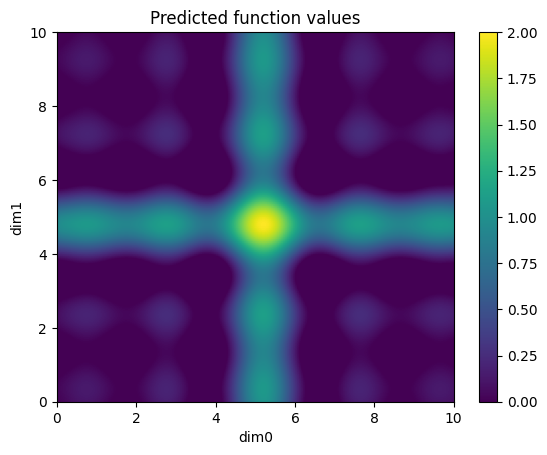

In [125]:
# plot the predicted function values
# especially in more than one dimension, you will need a lot of points to see something in this plot

plt.figure(1)
plt.imshow(function_value_mesh,extent=[0,10,0,10],aspect="auto",vmin=0,vmax=2)
plt.xlabel("dim0");plt.ylabel("dim1")
plt.title("Predicted function values")
#plt.scatter(loaded_optimization_run.optimizer.X[:,0]*loaded_optimization_run.optimizer.search_interval_size[0],loaded_optimization_run.optimizer.X[:,1]*loaded_optimization_run.optimizer.search_interval_size[1],c=loaded_optimization_run.optimizer.y)
plt.colorbar()

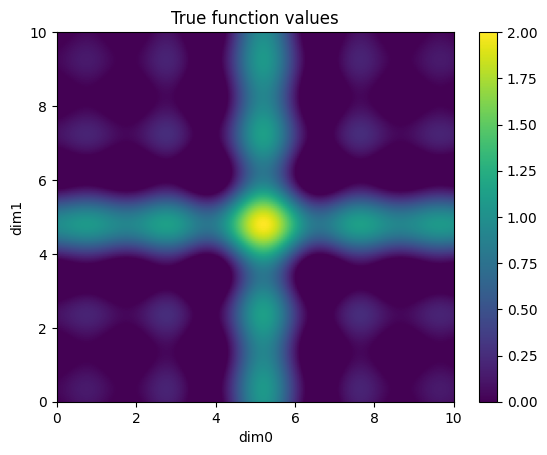

In [126]:
# plot the real function values
plt.figure(2)
plt.imshow(true_function_value_mesh,extent=[0,10,0,10],aspect="auto",vmin=0,vmax=2)
plt.xlabel("dim0");plt.ylabel("dim1")
plt.title("True function values")
#plt.scatter(loaded_optimization_run.optimizer.X[:,0]*loaded_optimization_run.optimizer.search_interval_size[0],loaded_optimization_run.optimizer.X[:,1]*loaded_optimization_run.optimizer.search_interval_size[1],c=loaded_optimization_run.optimizer.y)
plt.colorbar()